# Prereading

1. Watch the fun 20-minute "Mersenne Twister" video below.
2. Have a look over the following resources to make yourself aware of their general purposes.

    1. https://www.random.org
    2. https://docs.python.org/3/library/random.html
    3. https://numpy.org/doc/stable/reference/random
    4. https://numpy.org/doc/stable/user/whatisnumpy.html
    5. https://numpy.org/doc/stable/reference/random/bit_generators/
    6. https://scipy.github.io/devdocs/tutorial/
    7. https://scipy.github.io/devdocs/tutorial/stats.html
    8. https://docs.scipy.org/doc/scipy/reference/stats.html
    9. https://docs.scipy.org/doc/scipy/reference/stats.sampling.html
    10. https://docs.scipy.org/doc/scipy/reference/stats.sampling.html#generators-for-pre-defined-distributions
    11. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sampling.FastGeneratorInversion.html


In [ ]:
from IPython.display import YouTubeVideo
# https://www.youtube.com/watch?v=_tN2ev3hO14
YouTubeVideo("_tN2ev3hO14", width=550, height=300)

# Lecture

First hour of class

## Inverse CDF Sampling


In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

# Parameters
n = 10000
animation_n = 10
x = np.random.uniform(size=n)

# Initialize the plot
fig, ax = plt.subplots(2,2)

support = np.linspace(0,10,1000)
ax[0,1].plot(support, stats.gamma(a=1).cdf(support)) 
ax[0,0].set_xlim(0, support.max())
ax[0,0].set_xlim(0, 1)
ax[0,0].set_ylim(0, 100)

# Function to update the histogram
bins = 30
def update(frame):
    
    ax[0,0].cla()
    ax[0,0].hist(x[:frame + 1], bins=10, orientation='horizontal',
                 color='blue', edgecolor='black', alpha=0.7)
    
    ax[1,1].cla()
    ax[1,1].hist(stats.gamma(a=1).ppf(x[:frame + 1]), bins=bins, density=True,
                 color='blue', edgecolor='black', alpha=0.7)
    ax[1,1].plot(support, stats.gamma(a=1).pdf(support), color='y')
    ax[1,1].set_xlim(0, support.max())

    return fig,

ani = FuncAnimation(fig, update, frames=range(animation_n,n,animation_n), interval=100)
plt.show()

### Proof

$$\large
\begin{align*}
& \quad\;\; \textrm{if} \quad Y_i = F_X^{-1}(U_i) \\
F_Y(y) = Pr\left(Y_i \leq y\right) &={} Pr\left(F_X^{-1}(U_i) \leq y\right)\\
&={} Pr\left(U_i \leq F_X(y)\right)\\
&={} Pr\left(U_i \leq Pr\left(X_i \leq y\right)\right) \quad \textrm{if} \quad  U_i \sim \textrm{Uniform}(0,1)\\
&={} Pr\left(X_i \leq y\right)\\
&={} F_X(y)
\end{align*}$$


## Rejection Sampling

- ***Target distribution*** $f(X=x)$
- ***Proposal distribution*** $g(\tilde X=\tilde x)$

0. Choose $c$ such that $c \times g(x) > f(x)$ for all $x$ 
1. Sample $\tilde x_j \sim g(\tilde X)$ for $j = 1 \cdots m$
2. Keep $x_i = \tilde x_j$ with probability $\frac{f(\tilde x_j)}{c \times g(\tilde x_j)}$ where $i$ indexes the retained samples
3. $x_i \sim f(X=x)$ for $j = 1 \cdots n$ 


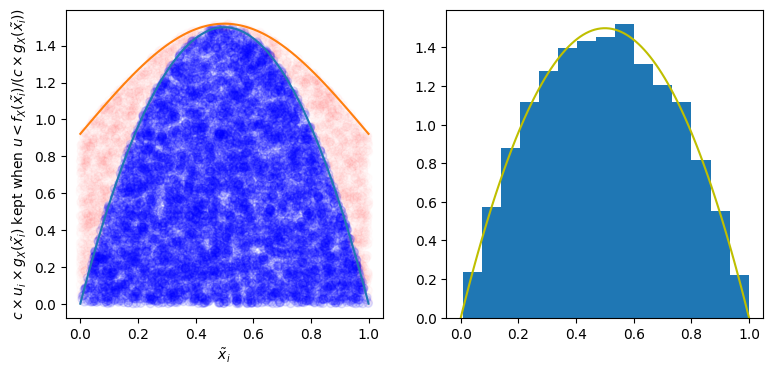

In [91]:
%matplotlib inline

# distribution of interest
support = np.linspace(0,1,100)
f_X = stats.beta(2,2)

# distribution tilde_p(tilde_x) such that c*tilde_p(x)>p(x) for all x
n = 10000
c = 1.3
g_X = stats.truncnorm(-1, 1, loc=0.5, scale=0.5)
tilde_x = tilde_X.rvs(size=n)

# auxiliary for rejection sampling probabilities
u = stats.uniform().rvs(size=n) 

fig,ax = plt.subplots(1,2, figsize=(9,4))

ax[0].scatter(tilde_x, u*c*g_X.pdf(tilde_x), 
            color=['b' if u_i*c*g_X.pdf(tilde_x_i)<f_X.pdf(tilde_x_i) else 'r' for tilde_x_i,u_i in zip(tilde_x,u)],
            alpha=[.1 if u_i*c*g_X.pdf(tilde_x_i)<f_X.pdf(tilde_x_i) else 0.01 for tilde_x_i,u_i in zip(tilde_x,u)])
ax[0].set_ylabel('$c\\times u_i \\times g_X(\\tilde{x_i})$ kept when $u < f_X(\\tilde{x_i})/(c\\times g_X(\\tilde{x_i}))$')
ax[0].set_xlabel('$\\tilde x_i$')
ax[0].plot(support, f_X.pdf(support))
ax[0].plot(support, c*g_X.pdf(support))

ax[1].hist(tilde_x[u*c*g_X.pdf(tilde_x)<f_X.pdf(tilde_x)], density=True, bins=15)
ax[1].plot(support, f_X.pdf(support), color='y')

plt.show()

### Proof

**Rejection sampling** changes the *univariate* sampling problem $x_i \sim f(X)$<br> into an agumented *two-dimensional* problem where $\tilde x_i \sim g(\tilde X)$ 
and $u_i \sim \textrm{Uniform}(0,1)$ 

<br>

\begin{align*}
{Pr\left(\tilde X \leq x \;\big|\; U \leq \frac{f(\tilde X)}{c \times g(\tilde X)} \right)} & ={} Pr\left(\tilde X \leq x, U \leq \frac{f(\tilde X)}{c \times g(\tilde X)} \right) \Bigg/ Pr\left( U \leq \frac{f(\tilde X)}{c \times g(\tilde X)} \right)\\
& ={} \int_{-\infty}^{x} \int_{0}^{\frac{f(\tilde x)}{c \times g(\tilde x)}} g(\tilde x) \;du\; d\tilde x  \Bigg/  \int_{-\infty}^{\infty} \int_{0}^{\frac{f(\tilde x)}{c \times g(\tilde x)}} g(\tilde x) \;du\; d\tilde x \\
& ={} \int_{-\infty}^{x} {\frac{f(\tilde x)}{c }}  d\tilde x  \Bigg/  \int_{-\infty}^{\infty} {\frac{f(\tilde x)}{c }} d\tilde x  = \int_{-\infty}^{x} f(\tilde x) d\tilde x = F(X)
\end{align*}


# Class Coding Challenge

This is
- in person in approximately the final two hours of class
- open notes and open internet **but you may not collaborate with classmates**

This will 

- utilize the coding skills practiced on the homework
- ask questions regarding the prelecture homework
- ask questions regarding the prelecture reading
- ask questions regarding the lecture itself